In [1]:
import pandas as pd
import os

import scipy.stats
from scipy.stats import hypergeom
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt
from itertools import combinations
%pylab inline
import collections
import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
#these files were generated using '101319 cofactor analysis.ipynb' and '101319  single factor analysis.ipynb'
ba_cf=pd.read_csv("../../output/072020_cofactor_analysis_ba.csv",sep=',')
sc_cf=pd.read_csv("../../output/072020_cofactor_analysis_sc.csv",sep=',')
ba_df=pd.read_csv("../../output/072020_single_factor_analysis_data_DE_NB_ba.csv",sep=',')
sc_df=pd.read_csv("../../output/072020_single_factor_analysis_data_DE_NB_sc.csv",sep=',')
#this file is generated in 'Figure 1 data 101319.ipynb' -this file is independent of data source (ba or sc)
gdata=pd.read_csv("../../data/genetic_data/071420_genetic_data_TFdep_gt_TF_indep.csv",sep=',')

In [3]:
data_source='sc'
df=sc_cf
print(len(df))


14909


In [ ]:
#write supp. tables.
#2A results for 
TFs='unc-3,che-1,ttx-3,hlh-4'.split(',')
ncs=['DA','DB','VA','VB','ASE','ADL','AIY']
print(TFs)
x=sc_df.loc[(sc_df['TF'].isin(TFs)) & (sc_df['neuron_class'].isin(ncs))][sc_df.columns.values[1:]].sort_values(ascending=True, by=['TF'])
x.to_csv('../../MS/Supp_Tables_Jan_2020/Supplementary_Table_2A_four_bonefide_Terminal_selectors_motif_resuls_single_cell_data.csv',sep=',')

In [ ]:
data_source='ba'
df=ba_cf
print(len(df))

In [6]:
def piechart(labels,sizes,explode,leg_title,data_source,colorlist):
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    fig1, ax1 = plt.subplots()
    wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels,autopct='', textprops=dict(color="w"),shadow=False, startangle=90, colors=colorlist)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    ax1.legend(wedges, labels,
          title=leg_title,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    #bbox_to_anchor=(1, 0, 0.5, 1)
    #plt.title(data_source)
    plt.tight_layout()
    plt.savefig('../../output/figure_parts/Fig9B_piechart_%s_%s110119.pdf' %(data_source,leg_title))
    plt.show()

In [7]:
def getModel_count(mod,df):
    return len(df.loc[df["model"]==mod])

def getModel_count_nc_tf(mod,df):
    r=df.loc[df["model"]==mod]
    nc_count=len(r["neuron_class"].drop_duplicates())
    tfA=list(r["TFA"].drop_duplicates().values)
    tfB=list(r["TFB"].drop_duplicates().values)
    tf_count=len(set(tfA+tfB))
    return nc_count,tf_count
def getModel_cf_tf_count(mod,df):
    r=len(df.loc[df["model"]==mod][["TFA","TFB"]].drop_duplicates())
    return r



In [8]:
mod='A-I'
r=len(df.loc[df["model"]==mod][["TFA","TFB"]].drop_duplicates())
print(r)

2883


In [9]:
mod='A-I'
r=len(df.loc[df["model"]==mod].drop_duplicates())
print(r)

11623


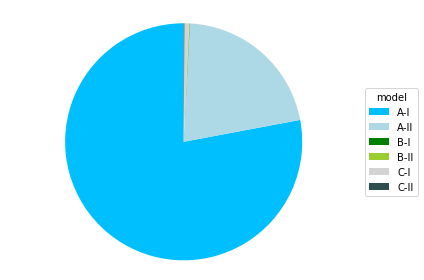

117 neuron classes in sc
['A-I', 'A-II', 'B-I', 'B-II', 'C-I', 'C-II']
14909 [11623, 3161, 7, 10, 93, 15]
sizes prop: ['78.0', '21.2', '0.0', '0.1', '0.6', '0.1']
nc count, tf count per model [(117, 134), (106, 130), (3, 7), (6, 6), (12, 29), (2, 10)]
sum cf counts 4120
cofactor counts per model [2883, 1146, 6, 5, 65, 15]


In [10]:
#fig 9B pie chart overview of models
colorlist=['deepskyblue','lightblue','green','yellowgreen','lightgrey','darkslategrey']
models=["A-I","A-II","B-I","B-II","C-I","C-II"]   
labels=models
sizes=[getModel_count(mod,df) for mod in labels]
nclass_tf_sizes=[getModel_count_nc_tf(mod,df) for mod in labels]

explode=(0,0,0,0,0,0)
leg_title='model'
piechart(labels,sizes,explode,leg_title,data_source,colorlist)
#plt.savefig('../../output/figure_parts/Fig9_CF_piechart_overview_%s.pdf' %data_source)
neuron_classes=df["neuron_class"].drop_duplicates()
print('%s neuron classes in %s' %(len(neuron_classes),data_source))
sizes_prop=['%.1f' %(float(i)/sum(sizes)*100.0) for i in sizes]
print(labels)
print(sum(sizes),sizes)
print('sizes prop:',sizes_prop)
print('nc count, tf count per model',nclass_tf_sizes)
cf_counts=[ getModel_cf_tf_count(mod,df) for mod in models]
print('sum cf counts',sum(cf_counts))
print('cofactor counts per model',cf_counts)

In [11]:
#where do VD_DD fall?
x=sc_cf.loc[sc_cf['neuron_class']=='NSM']
x.loc[(x["TFB"]=='dmd-6') & (x["TFA"]=='die-1')]

Unnamed: 0   comb_model model    TFA    TFB    motifA_ID    motifB_ID  \
9030        9030  B-I,B-I,B-I   B-I  die-1  dmd-6  M00610_2.00  M00655_2.00   

     neuron_class  marker_countAB      exp_motifAB  ...   rs_pvalAB_A  \
9030          NSM           607.0       585.678215  ...  1.400846e-52   

       rs_pvalAB_B  best_subset_rs_pvalAB_A  best_subset_rs_pvalAB_B  \
9030  9.380856e-27            4.613437e-102             2.477768e-99   

          num_genes_in_subset  hg_pvalAB*  rs_pvalAB_A*  rs_pvalAB_B*  \
9030                    299.0    0.077561  2.457084e-50  9.475555e-26   

      best_subset_rs_pvalAB_A*  best_subset_rs_pvalAB_B*  
9030              1.810046e-99              6.156839e-97  

[1 rows x 22 columns]

In [12]:
x=sc_cf.loc[sc_cf['neuron_class'].isin(['AUA'])]
x.loc[(x["TFA"]=='ceh-18') & (x["TFB"]=='mbr-1')]

Unnamed: 0    comb_model model     TFA    TFB    motifA_ID    motifB_ID  \
3832        3832  C-I,A-I,A-II   C-I  ceh-18  mbr-1  M00681_2.00  M00707_2.00   

     neuron_class  marker_countAB      exp_motifAB  ...  rs_pvalAB_A  \
3832          AUA            40.0        15.668894  ...     0.000013   

      rs_pvalAB_B  best_subset_rs_pvalAB_A  best_subset_rs_pvalAB_B  \
3832     0.367653                      1.0                      1.0   

          num_genes_in_subset    hg_pvalAB*  rs_pvalAB_A*  rs_pvalAB_B*  \
3832                      0.0  3.376806e-08      0.000026      0.377971   

      best_subset_rs_pvalAB_A*  best_subset_rs_pvalAB_B*  
3832                       1.0                       1.0  

[1 rows x 22 columns]

In [13]:
sc_cf.loc[sc_cf["comb_model"]=="C-I,A-I,A-II"]

Unnamed: 0    comb_model model     TFA     TFB    motifA_ID  \
3832         3832  C-I,A-I,A-II   C-I  ceh-18   mbr-1  M00681_2.00   
9071         9071  C-I,A-I,A-II   C-I  ceh-74  ceh-32  M01248_2.00   
14077       14077  C-I,A-I,A-II   C-I  ceh-74  ceh-32  M01248_2.00   
14111       14111  C-I,A-I,A-II   C-I  unc-86  ceh-32  M02244_2.00   

         motifB_ID neuron_class  marker_countAB      exp_motifAB  ...  \
3832   M00707_2.00          AUA            40.0        15.668894  ...   
9071   M00483_2.00          OLL            18.0         3.774514  ...   
14077  M00483_2.00          URY            11.0         2.867179  ...   
14111  M00483_2.00          URY            15.0         3.634187  ...   

       rs_pvalAB_A  rs_pvalAB_B  best_subset_rs_pvalAB_A  \
3832      0.000013     0.367653                      1.0   
9071      0.140008     0.813527                      1.0   
14077     0.106410     0.325584                      1.0   
14111     0.083135     0.907121                      1.0   

       best_subset_rs_pvalAB_B      num_genes_in_subset    hg_pvalAB*  \
3832                       1.0                      0.0  3.376806e-08   
9071                       1.0                      0.0  3.796686e-08   
14077                      1.0                      0.0  1.306988e-04   
14111                      1.0                      0.0  2.803389e-06   

       rs_pvalAB_A*  rs_pvalAB_B*  best_subset_rs_pvalAB_A*  \
3832       0.000026      0.377971                       1.0   
9071       0.157360      0.819021                       1.0   
14077      0.121476      0.335624                       1.0   
14111      0.096231      0.909990                       1.0   

       best_subset_rs_pvalAB_B*  
3832                        1.0  
9071                        1.0  
14077                       1.0  
14111                       1.0  

[4 rows x 22 columns]

In [14]:
df.columns.values

array(['Unnamed: 0', 'comb_model', 'model', 'TFA', 'TFB', 'motifA_ID',
       'motifB_ID', 'neuron_class', 'marker_countAB', '    exp_motifAB',
       'fcAB', 'hg_pvalAB', 'rs_pvalAB_A', 'rs_pvalAB_B',
       'best_subset_rs_pvalAB_A', 'best_subset_rs_pvalAB_B',
       '    num_genes_in_subset', 'hg_pvalAB*', 'rs_pvalAB_A*',
       'rs_pvalAB_B*', 'best_subset_rs_pvalAB_A*',
       'best_subset_rs_pvalAB_B*'], dtype=object)

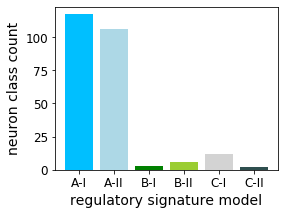

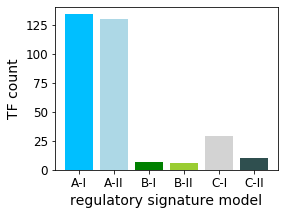

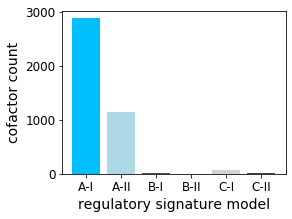

In [15]:
nc_counts=[i[0] for i in nclass_tf_sizes]
tf_counts=[i[1] for i in nclass_tf_sizes]

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize

colorlist=['deepskyblue','lightblue','green','yellowgreen','lightgrey','darkslategrey']

rcParams['figure.figsize'] = 4, 3
plt.bar(range(len(models)),nc_counts,color=colorlist)
ind = np.arange(len(models))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("neuron class count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig9_barplot_nc_count_models.pdf')
plt.show()

rcParams['figure.figsize'] = 4, 3
plt.bar(range(len(models)),tf_counts,color=colorlist)
ind = np.arange(len(models))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("TF count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig9_barplot_tf_count_models.pdf')
plt.show()

rcParams['figure.figsize'] = 4, 3
plt.bar(range(len(models)),cf_counts,color=colorlist)
ind = np.arange(len(models))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=0)

plt.ylabel("cofactor count")
plt.xlabel("regulatory signature model")
plt.savefig('../../output/figure_parts/Fig9_barplot_cf_TF_count_models.pdf')
plt.show()

In [16]:
neuron_classes=df["neuron_class"].drop_duplicates().values
def getModel_count(mod,r):
    return len(r.loc[df["model"]==mod])

dn=pd.DataFrame()
headers=['neuron_class']+models
for nc in neuron_classes:
    r=df.loc[df['neuron_class']==nc]
    mods=r["model"].values
    sizes=[getModel_count(mod,r) for mod in models]
    results=[nc]+sizes
    dictionary = dict(zip(headers, results))
    dn=dn.append(dictionary,ignore_index=True)
dn=dn[headers].sort_values(ascending=False,by=models).drop_duplicates()
dn.head(10)

neuron_class    A-I  A-II  B-I  B-II  C-I  C-II
90           RIG  405.0   1.0  0.0   0.0  0.0   0.0
36           AWC  312.0  39.0  0.0   0.0  0.0   0.0
17           ASG  293.0   7.0  0.0   0.0  0.0   0.0
42            DB  285.0  40.0  0.0   0.0  0.0   0.0
114           VB  275.0  50.0  0.0   0.0  0.0   0.0
2            ADF  261.0  90.0  0.0   0.0  0.0   0.0
16           ASE  254.0  97.0  0.0   0.0  0.0   0.0
4            AFD  235.0  65.0  0.0   0.0  0.0   0.0
84           PVW  232.0  21.0  0.0   0.0  0.0   0.0
10           AIZ  231.0   0.0  0.0   0.0  0.0   0.0

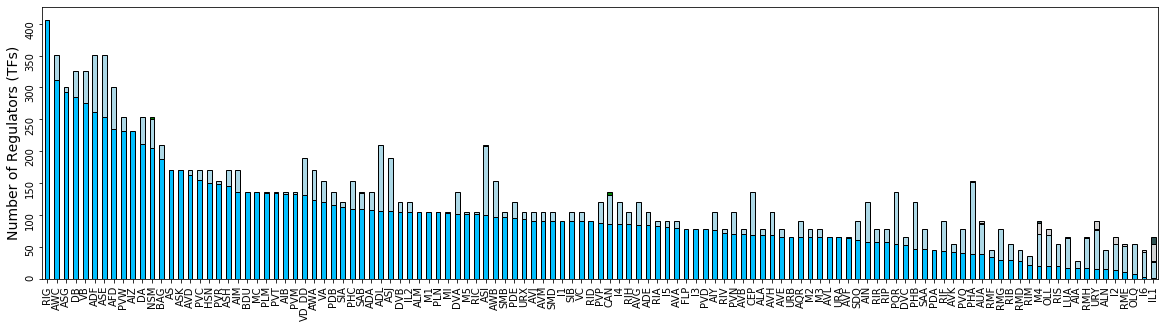

In [17]:
#Figure 9C. barplot by neuron class showing cofactor models
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=10)    # legend fontsize

ax=dn.plot.bar(stacked=True,figsize=(20,5),color=colorlist,legend=False,edgecolor='black')
xlabels=list(dn["neuron_class"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("Number of Regulators (TFs)")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig9D_CF_bar_chart_TF_types_by_neuron_class_%s.pdf' %data_source)
plt.show()

In [18]:
def getColorlist(models):
    colorlist=[]
    for m in models:
        if m=='A-I,A-I,A-I':
            colorlist.append('darkblue')
        
        elif m.startswith('A-II'):
            colorlist.append('lightblue')
        elif m.startswith('A-I'):
            colorlist.append('deepskyblue')
        elif m.startswith('B-II'):
            colorlist.append('yellowgreen')
        elif m.startswith('B-I'):
            colorlist.append('green')
        elif m.startswith('C-II'):
            colorlist.append('darkslategrey')
        elif m.startswith('C-I'):
            colorlist.append('lightgrey')
        
    return colorlist

In [19]:
print(getColorlist(['A-II,A-I,A-II']))

['lightblue']


In [20]:
#go over models and sizes and combine model/size where M,TF1M, TF2M = M, TF2M, TF1M

comb_models_sorted=['%s,%s,%s' %(m.split(',')[0],sorted(m.split(',')[1:])[0],sorted(m.split(',')[1:])[1] ) for m in list(df["comb_model"].values)]
df["comb_model_sorted"]=comb_models_sorted

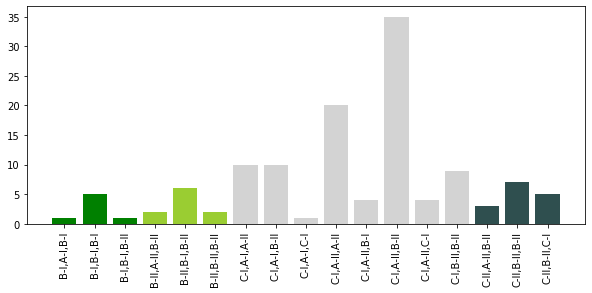

In [21]:
#figure 9E. comb models barchart.
#from pylab import rcParams




models=sorted(list(df["comb_model_sorted"].drop_duplicates().values))
models=[i for i in models if i[0]!='A']
rcParams['figure.figsize'] = 10, 4
colorlist=getColorlist(models)
r=list(df["comb_model_sorted"].values)
sizes=[r.count(mod) for mod in models]


#go over models and sizes and combine model/size where M,TF1M, TF2M = M, TF2M, TF1M




plt.bar(range(len(sizes)),sizes,color=colorlist)
ind = np.arange(len(sizes))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=90)
#plt.yticks(np.arange(0, 81, 10))
plt.savefig('../../output/figure_parts/Fig9_barplot_comb_models.pdf')
plt.show()

In [22]:
TFs_model_C=sc_df.loc[sc_df["model"].isin(['C-I','C-II'])]["TF"].values
TFs_model_C
    


array(['ceh-32'], dtype=object)

In [23]:
print(models)
print(sizes)

['B-I,A-I,B-I', 'B-I,B-I,B-I', 'B-I,B-I,B-II', 'B-II,A-II,B-II', 'B-II,B-I,B-II', 'B-II,B-II,B-II', 'C-I,A-I,A-II', 'C-I,A-I,B-II', 'C-I,A-I,C-I', 'C-I,A-II,A-II', 'C-I,A-II,B-I', 'C-I,A-II,B-II', 'C-I,A-II,C-I', 'C-I,B-II,B-II', 'C-II,A-II,B-II', 'C-II,B-II,B-II', 'C-II,B-II,C-I']
[1, 5, 1, 2, 6, 2, 10, 10, 1, 20, 4, 35, 4, 9, 3, 7, 5]


In [24]:
sums=0
c=0
for i in range(len(models)):
    if models[i].startswith('C'):
    
        s=models[i].split(',')
        if 'C' in s[-1] or 'C' in s[-2]:
            print(models[i],sizes[i])
            sums=sums+sizes[i]
        else:
            c+=1
    
        
print(sums)
print(c)
print(sums/(sums+c)*100, 'percent of CF model C results are explained by a C-type TF in the pair tested')

C-I,A-I,C-I 1
C-I,A-II,C-I 4
C-II,B-II,C-I 5
10
8
55.55555555555556 percent of CF model C results are explained by a C-type TF in the pair tested


[9129, 841, 1073, 101, 108, 83, 39, 159, 75, 15, 196, 1654, 21, 260, 392, 171, 298, 6, 91, 71, 1]


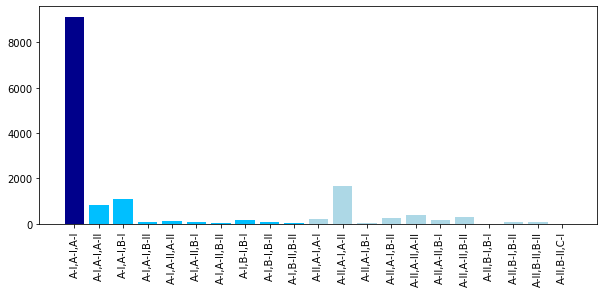

In [25]:
models=sorted(list(df["comb_model_sorted"].drop_duplicates().values))
models=[i for i in models if i.startswith('A')]
colorlist=getColorlist(models)
r=list(df["comb_model_sorted"].values)
sizes=[r.count(mod) for mod in models]
print(sizes)
plt.bar(range(len(sizes)),sizes,color=colorlist)
ind = np.arange(len(sizes))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.xticks(ind, models, rotation=90)
#plt.yticks(np.arange(0, 81, 10))
plt.savefig('../../output/figure_parts/Fig9b_barplot_comb_models.pdf')
plt.show()



In [26]:
len(df.drop_duplicates())

14909

9325 all cofactor combos with TFA and TFB=A-1
A-I,A-I,A-I 9129 97.90
A-II,A-I,A-I 196 2.10


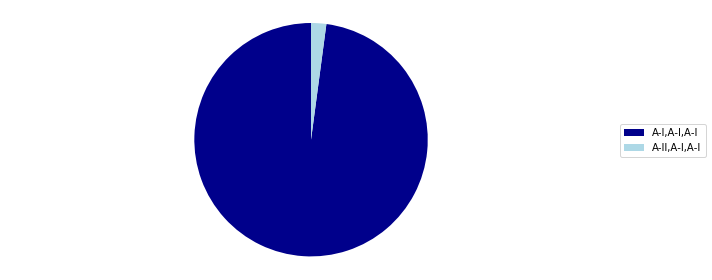

<Figure size 720x288 with 0 Axes>

In [27]:
#show all combinations where TFA and TFB are A-1 terminal selectors. Check if CF motif shows they coregualte as A1 cofactors.

models=sorted(list(df["comb_model_sorted"].drop_duplicates().values))
#rcParams['figure.figsize'] = 10, 4
colorlist=getColorlist(models)
r=list(df["comb_model_sorted"].values)
sizes=[r.count(mod) for mod in models]

ilist=[]
#print(models)
for i in range(len(models)):
    if models[i].endswith(',A-I,A-I'):
        #print(models[i], sizes[i])
        ilist.append(sizes[i])
s=sum(ilist)
print(s,'all cofactor combos with TFA and TFB=A-1')
AA_sizes=[]
AA_models=[]
for i in range(len(models)):
    if models[i].endswith(',A-I,A-I'):
        print(models[i], sizes[i], '%.2f' %(sizes[i]/float(s)*100))
        AA_models.append(models[i])
        AA_sizes.append(sizes[i])

#piechart        
labels=AA_models
sizes=AA_sizes
explode=[0]*len(sizes)
leg_title=''
colorlist=getColorlist(AA_models)
piechart(labels,sizes,explode,leg_title,data_source,colorlist)
plt.savefig('../../output/figure_parts/fig9_TFA_TFB_both_AA_CF_models_piechart.pdf')

In [28]:
df.loc[df['comb_model']=='B-I,B-I,B-I'].sort_values(ascending=True,by=['rs_pvalAB_B*'])

Unnamed: 0   comb_model model     TFA     TFB    motifA_ID    motifB_ID  \
9029        9029  B-I,B-I,B-I   B-I   die-1  ztf-11  M00610_2.00  M00650_2.00   
9030        9030  B-I,B-I,B-I   B-I   die-1   dmd-6  M00610_2.00  M00655_2.00   
6059        6059  B-I,B-I,B-I   B-I   ztf-2  ztf-11  M01866_2.00  M00650_2.00   
6063        6063  B-I,B-I,B-I   B-I  ztf-11  nhr-66  M00650_2.00  M00694_2.00   
237          237  B-I,B-I,B-I   B-I   die-1  ztf-11  M00610_2.00  M00650_2.00   

     neuron_class  marker_countAB      exp_motifAB  ...   rs_pvalAB_B  \
9029          NSM           541.0       525.949223  ...  2.206679e-32   
9030          NSM           607.0       585.678215  ...  9.380856e-27   
6059          CAN           296.0       301.769406  ...  5.620223e-15   
6063          CAN           342.0       318.283779  ...  7.446314e-11   
237           ADE           157.0       143.490869  ...  1.673216e-09   

      best_subset_rs_pvalAB_A  best_subset_rs_pvalAB_B  \
9029            7.741018e-106             4.252803e-85   
9030            4.613437e-102             2.477768e-99   
6059             9.334502e-33             7.255256e-39   
6063             5.704307e-44             4.020652e-37   
237              1.578484e-31             3.956014e-26   

          num_genes_in_subset  hg_pvalAB*  rs_pvalAB_A*  rs_pvalAB_B*  \
9029                    310.0    0.165794  2.786383e-52  3.455816e-31   
9030                    299.0    0.077561  2.457084e-50  9.475555e-26   
6059                    101.0    0.665640  9.795882e-07  2.060794e-14   
6063                    125.0    0.058761  3.407210e-14  1.846285e-10   
237                      80.0    0.050881  3.704136e-15  3.619557e-09   

      best_subset_rs_pvalAB_A*  best_subset_rs_pvalAB_B*  comb_model_sorted  
9029             5.245947e-103              4.117210e-83        B-I,B-I,B-I  
9030              1.810046e-99              6.156839e-97        B-I,B-I,B-I  
6059              6.674729e-32              6.230911e-38        B-I,B-I,B-I  
6063              7.940757e-43              3.146661e-36        B-I,B-I,B-I  
237               1.038553e-30              1.574065e-25        B-I,B-I,B-I  

[5 rows x 23 columns]

In [29]:
def get_comb_model_count(mod,r):
    return len(r.loc[df["comb_model_sorted"]==mod])

In [30]:
#FIgure 9F. combined models by nc.

neuron_classes=df["neuron_class"].drop_duplicates().values
#models=["A_1","A_2","B_1","B_2","C_1","C_2"] 
models=sorted(list(df["comb_model_sorted"].drop_duplicates().values))
colorlist=getColorlist(models)


dn=pd.DataFrame()
headers=['neuron_class']+models
for nc in neuron_classes:
    r=df.loc[df['neuron_class']==nc]
    mods=r["comb_model_sorted"].values
    sizes=[get_comb_model_count(mod,r) for mod in models]
    results=[nc]+sizes
    dictionary = dict(zip(headers, results))
    dn=dn.append(dictionary,ignore_index=True)
dn=dn[headers].sort_values(ascending=False,by=models).drop_duplicates()
#dn=dn[headers].sort_values(ascending=False,by=[models]).drop_duplicates()

In [32]:
x=df.loc[(df["neuron_class"]=="AVD") & ((df['TFA']=='fax-1')| (df["TFB"]=='fax-1')) & (df['comb_model']=='A-I,A-I,A-I')]
x.sort_values(ascending=True,by='hg_pvalAB*')
#x

Empty DataFrame
Columns: [Unnamed: 0, comb_model, model, TFA, TFB, motifA_ID, motifB_ID, neuron_class, marker_countAB,     exp_motifAB, fcAB, hg_pvalAB, rs_pvalAB_A, rs_pvalAB_B, best_subset_rs_pvalAB_A, best_subset_rs_pvalAB_B,     num_genes_in_subset, hg_pvalAB*, rs_pvalAB_A*, rs_pvalAB_B*, best_subset_rs_pvalAB_A*, best_subset_rs_pvalAB_B*, comb_model_sorted]
Index: []

[0 rows x 23 columns]

In [33]:
x=df.loc[(df["neuron_class"]=="AVD") & ((df['TFA']=='unc-42')| (df["TFB"]=='unc-42')) & (df['comb_model']=='A-I,A-I,A-I')]
x.sort_values(ascending=True,by='hg_pvalAB*')
#x

Unnamed: 0   comb_model model     TFA     TFB    motifA_ID  \
4076        4076  A-I,A-I,A-I   A-I   jun-1  unc-42  M00599_2.00   
4155        4155  A-I,A-I,A-I   A-I  unc-42   unc-3  M03874_2.00   
4159        4159  A-I,A-I,A-I   A-I  unc-42   ztf-9  M03874_2.00   
4154        4154  A-I,A-I,A-I   A-I  unc-42   tab-1  M03874_2.00   
4156        4156  A-I,A-I,A-I   A-I  unc-42   tbx-2  M03874_2.00   
4158        4158  A-I,A-I,A-I   A-I  unc-42   ztf-3  M03874_2.00   
4130        4130  A-I,A-I,A-I   A-I  ceh-58  unc-42  M00676_2.00   
4118        4118  A-I,A-I,A-I   A-I  ceh-74  unc-42  M01248_2.00   
4152        4152  A-I,A-I,A-I   A-I  unc-42   vab-3  M03874_2.00   
4160        4160  A-I,A-I,A-I   A-I  unc-42   pag-3  M03874_2.00   
4141        4141  A-I,A-I,A-I   A-I  ceh-18  unc-42  M00681_2.00   
4157        4157  A-I,A-I,A-I   A-I  unc-42  lin-31  M03874_2.00   
4043        4043  A-I,A-I,A-I   A-I   cfi-1  unc-42  M01667_2.00   
4105        4105  A-I,A-I,A-I   A-I  ceh-48  unc-42  M01905_2.00   
4060        4060  A-I,A-I,A-I   A-I  hlh-30  unc-42  M00937_2.00   
4161        4161  A-I,A-I,A-I   A-I  unc-42  ztf-11  M03874_2.00   
4091        4091  A-I,A-I,A-I   A-I  ceh-38  unc-42  M03716_2.00   

         motifB_ID neuron_class  marker_countAB      exp_motifAB  ...  \
4076   M03874_2.00          AVD           101.0        23.780387  ...   
4155  OH2011_UNC-3          AVD            82.0        15.739343  ...   
4159   M00636_2.00          AVD            90.0        20.557037  ...   
4154   M00516_2.00          AVD            91.0        21.492849  ...   
4156   M00830_2.00          AVD            97.0        25.740584  ...   
4158   M00640_2.00          AVD            97.0        25.856116  ...   
4130   M03874_2.00          AVD            96.0        25.432498  ...   
4118   M03874_2.00          AVD            79.0        17.591710  ...   
4152   M00342_2.00          AVD           100.0        29.233509  ...   
4160   M00619_2.00          AVD           109.0        38.164152  ...   
4141   M03874_2.00          AVD           105.0        35.745677  ...   
4157   M00665_2.00          AVD           116.0        45.920216  ...   
4043   M03874_2.00          AVD           113.0        44.741787  ...   
4105   M03874_2.00          AVD           101.0        37.571086  ...   
4060   M03874_2.00          AVD            68.0        17.922902  ...   
4161   M00650_2.00          AVD           117.0        49.713525  ...   
4091   M03874_2.00          AVD            95.0        37.836810  ...   

       rs_pvalAB_B  best_subset_rs_pvalAB_A  best_subset_rs_pvalAB_B  \
4076  7.368603e-15             3.361934e-15             5.210052e-19   
4155  1.069760e-12             1.503763e-18             2.056902e-14   
4159  1.358791e-08             1.870864e-13             6.048803e-12   
4154  6.444441e-09             2.171967e-20             1.480423e-15   
4156  6.916435e-10             9.027767e-21             1.346492e-17   
4158  1.478053e-11             9.116108e-22             1.008604e-17   
4130  3.577433e-15             2.292893e-18             1.474700e-21   
4118  1.415876e-13             7.410628e-13             7.477730e-16   
4152  8.917219e-06             3.293565e-18             4.904583e-18   
4160  1.380381e-14             8.078775e-20             5.761681e-24   
4141  4.370884e-14             4.087782e-22             3.937956e-22   
4157  1.568884e-16             2.386742e-22             8.955118e-24   
4043  2.344356e-15             6.207045e-23             1.321174e-21   
4105  2.314806e-12             4.649275e-14             1.778344e-14   
4060  3.445994e-10             5.866571e-07             1.425620e-08   
4161  1.167919e-22             2.400942e-25             1.826006e-25   
4091  3.907772e-12             7.536634e-14             1.238152e-14   

          num_genes_in_subset    hg_pvalAB*  rs_pvalAB_A*  rs_pvalAB_B*  \
4076                     53.0  2.705019e-38  8.903701e-09  2.669060e-14   
4155               

In [34]:
x=df.loc[(df['comb_model']=='C-I,A-I,A-I')]
x.sort_values(ascending=True,by='hg_pvalAB*')

Empty DataFrame
Columns: [Unnamed: 0, comb_model, model, TFA, TFB, motifA_ID, motifB_ID, neuron_class, marker_countAB,     exp_motifAB, fcAB, hg_pvalAB, rs_pvalAB_A, rs_pvalAB_B, best_subset_rs_pvalAB_A, best_subset_rs_pvalAB_B,     num_genes_in_subset, hg_pvalAB*, rs_pvalAB_A*, rs_pvalAB_B*, best_subset_rs_pvalAB_A*, best_subset_rs_pvalAB_B*, comb_model_sorted]
Index: []

[0 rows x 23 columns]

In [35]:
#ceh-8 or ceh-32, the RIA 
x=df.loc[(df["neuron_class"]=="RIA") & ((df['TFA']=='ceh-32')| (df["TFB"]=='ceh-32')) & (df['comb_model']=='A-I,A-I,A-I')]
x.sort_values(ascending=True,by='rs_pvalAB_A*')

Unnamed: 0   comb_model model     TFA     TFB    motifA_ID  \
11529       11529  A-I,A-I,A-I   A-I   atf-7  ceh-32  M00595_2.00   
11567       11567  A-I,A-I,A-I   A-I  ceh-58  ceh-32  M00676_2.00   
11550       11550  A-I,A-I,A-I   A-I  ceh-48  ceh-32  M01905_2.00   
11588       11588  A-I,A-I,A-I   A-I  ceh-32   ztf-9  M00483_2.00   
11574       11574  A-I,A-I,A-I   A-I  unc-62  ceh-32  M02185_2.00   
11586       11586  A-I,A-I,A-I   A-I  ceh-32   ceh-8  M00483_2.00   
11587       11587  A-I,A-I,A-I   A-I  ceh-32   ztf-3  M00483_2.00   
11559       11559  A-I,A-I,A-I   A-I  ceh-74  ceh-32  M01248_2.00   
11580       11580  A-I,A-I,A-I   A-I   lim-7  ceh-32  M01242_2.00   

         motifB_ID neuron_class  marker_countAB      exp_motifAB  ...  \
11529  M00483_2.00          RIA            69.0        23.782347  ...   
11567  M00483_2.00          RIA            76.0        23.086671  ...   
11550  M00483_2.00          RIA            78.0        34.105627  ...   
11588  M00636_2.00          RIA            67.0        18.660910  ...   
11574  M00483_2.00          RIA            73.0        22.478391  ...   
11586  M00426_2.00          RIA            76.0        21.275814  ...   
11587  M00640_2.00          RIA            79.0        23.471215  ...   
11559  M00483_2.00          RIA            64.0        15.969096  ...   
11580  M00483_2.00          RIA            67.0        26.065145  ...   

        rs_pvalAB_B  best_subset_rs_pvalAB_A  best_subset_rs_pvalAB_B  \
11529  6.201180e-05             1.420643e-14             8.752674e-09   
11567  4.300477e-06             3.444103e-15             7.725766e-09   
11550  1.404104e-06             4.368082e-11             5.009796e-08   
11588  2.660281e-09             1.880357e-09             9.074846e-16   
11574  2.949232e-06             1.805239e-13             1.225199e-09   
11586  1.194863e-06             1.573345e-09             2.063911e-16   
11587  4.533892e-12             1.180543e-10             2.743172e-19   
11559  1.371109e-04             2.556766e-11             4.600744e-07   
11580  4.018304e-06             7.785982e-12             1.049943e-07   

           num_genes_in_subset    hg_pvalAB*  rs_pvalAB_A*  rs_pvalAB_B*  \
11529                     30.0  1.614376e-15  1.308468e-09  8.544097e-05   
11567                     56.0  3.927891e-20  2.287223e-08  6.652398e-06   
11550                     73.0  4.758098e-12  4.583245e-08  2.280120e-06   
11588                     50.0  9.967807e-20  8.086248e-07  5.641840e-09   
11574                     23.0  5.069762e-19  2.336479e-06  4.638686e-06   
11586                     51.0  3.288592e-22  2.891156e-06  1.957176e-06   
11587                     53.0  1.666755e-21  8.390670e-06  1.269405e-11   
11559                     21.0  2.700865e-21  8.921059e-04  1.830069e-04   
11580                     35.0  1.201791e-12  6.965906e-03  6.234664e-06   

       best_subset_rs_pvalAB_A*  best_subset_rs_pvalAB_B*  comb_model_sorted  
11529              2.734714e-14              1.086632e-08        A-I,A-I,A-I  
11567              6.988993e-15              9.615447e-09        A-I,A-I,A-I  
11550              6.458126e-11              5.966692e-08        A-I,A-I,A-I  
11588              2.482664e-09              1.755962e-15        A-I,A-I,A-I  
11574              3.194957e-13              1.601622e-09        A-I,A-I,A-I  
11586              2.087850e-09              4.172318e-16        A-I,A-I,A-I  
11587              1.693680e-10              6.845991e-19        A-I,A-I,A-I  
11559              3.844949e-11              5.234869e-07        A-I,A-I,A-I  
11580              1.213350e-11              1.230242e-07        A-I,A-I,A-I  

[9 rows x 23 columns]

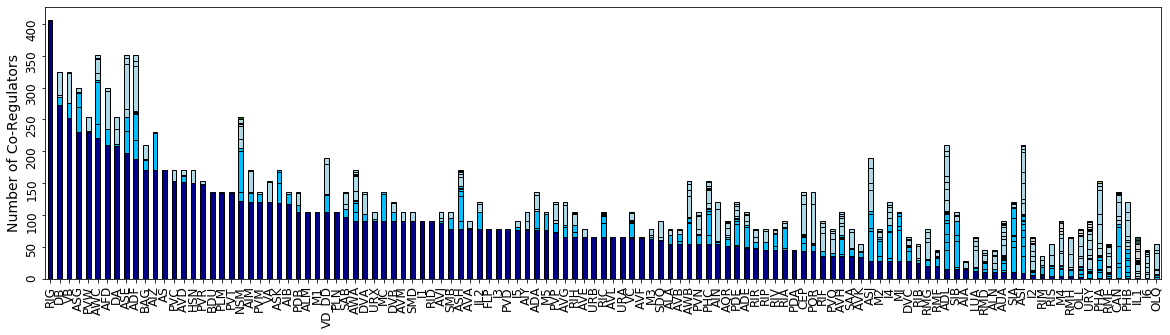

In [36]:

    

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize

ax=dn.plot.bar(stacked=True,figsize=(20,5),color=colorlist,legend=False,edgecolor='black')
xlabels=list(dn["neuron_class"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("Number of Co-Regulators")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig9F_bar_chart_comb_models_by_neuron_class_%s.pdf' %data_source)
plt.show()

In [37]:
#plot Figure 9G
neuron_classes=df.loc[df['comb_model_sorted']==models[0]]["neuron_class"].drop_duplicates().values
#models=["A_1","A_2","B_1","B_2","C_1","C_2"] 
models=sorted(list(df["comb_model"].drop_duplicates().values))
colorlist=getColorlist(models)

models=models[:1]

dn=pd.DataFrame()
headers=['neuron_class']+models
for nc in neuron_classes:
    r=df.loc[df['neuron_class']==nc]
    mods=r["comb_model_sorted"].values
    sizes=[get_comb_model_count(mod,r) for mod in models]
    results=[nc]+sizes
    dictionary = dict(zip(headers, results))
    dn=dn.append(dictionary,ignore_index=True)
dn=dn[headers].sort_values(ascending=False,by=models).drop_duplicates()

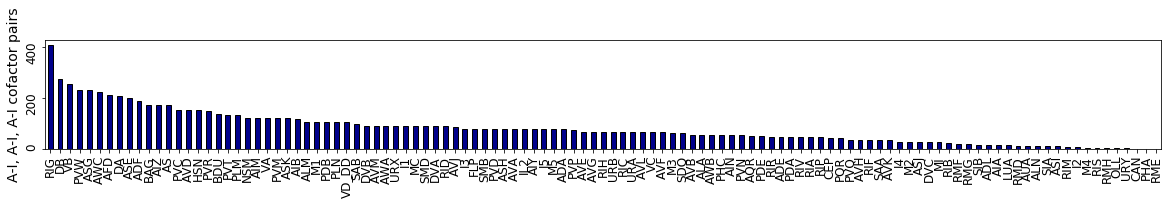

In [38]:

    

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)    # legend fontsize

ax=dn.plot.bar(stacked=True,figsize=(20,2),color=colorlist,legend=False,edgecolor='black')
xlabels=list(dn["neuron_class"].values)

ax.set_xticklabels(xlabels, rotation=90)
plt.yticks(rotation=90)
plt.ylabel("A-I, A-I, A-I cofactor pairs")
ax.grid(False)
plt.savefig('../../output/figure_parts/Fig9G_bar_chart_AAA_comb_models_by_neuron_class_%s.pdf' %data_source)
plt.show()

In [39]:
print('neuron classes with a AAA CF combo:', len(dn))

neuron classes with a AAA CF combo: 113


In [46]:
outfile=open('../../output/Supp.Table.2F.txt','w')


df['rs_sum*']=df['rs_pvalAB_A*']+df['rs_pvalAB_B*']
for nc in dn.neuron_class.drop_duplicates().values:
    r=df.loc[(df["neuron_class"]==nc) & (df["comb_model_sorted"]==models[0])].sort_values(ascending=True,by=['rs_sum*'])[["TFA","TFB"]].values

    cfs=''
    for i in r[:]:
        i=list(i)

        cfs=cfs+'%s::%s, ' %(i[0].strip(),i[1].strip())

    #get rid of trailing commas
    cfs=cfs[:-2]
    print('%s:' %nc, str(cfs))
    outfile.write("%s\t%s\n" %(nc, cfs))    
outfile.close()

RIG: ztf-11::dmd-6, egl-13::ztf-11, egl-13::dmd-6, egl-13::pag-3, ztf-3::pag-3, egl-13::ztf-3, egl-13::mef-2, ztf-3::ztf-11, ztf-3::dmd-6, mef-2::pag-3, mef-2::ztf-11, pag-3::dmd-6, mef-2::dmd-6, atf-7::ztf-3, ceh-16::ztf-3, pag-3::ztf-11, mef-2::ztf-3, atf-7::egl-13, ceh-16::pag-3, ceh-16::ztf-11, ceh-16::mef-2, atf-7::mef-2, atf-7::pag-3, ceh-16::dmd-6, atf-7::dmd-6, atf-7::ceh-16, atf-7::ztf-11, ceh-16::egl-13, egl-13::daf-16, atf-7::daf-16, daf-16::pag-3, ztf-3::syd-9, syd-9::pag-3, daf-16::ztf-11, syd-9::ztf-11, ceh-16::daf-16, daf-16::ztf-3, egl-13::syd-9, daf-16::syd-9, atf-7::syd-9, ceh-16::syd-9, mef-2::daf-16, daf-16::dmd-6, syd-9::dmd-6, mef-2::syd-9, ceh-48::egl-13, ceh-48::ztf-11, lim-6::syd-9, lim-6::ztf-3, ceh-48::ceh-16, ztf-3::egl-27, atf-7::ztf-9, atf-7::lim-6, pag-3::egl-27, egl-13::ztf-9, lim-6::egl-13, atf-7::unc-62, lim-6::pag-3, lim-6::daf-16, ceh-38::syd-9, daf-16::ztf-9, daf-16::egl-27, ceh-48::mef-2, unc-62::mef-2, unc-62::syd-9, lim-6::ztf-11, atf-7::egl-27, 

DVB: fkh-9::pha-4, ceh-18::pha-4, ceh-18::egl-5, ceh-18::lim-6, pha-4::ztf-3, ceh-58::egl-5, ceh-18::fkh-9, egl-5::pha-4, ceh-18::ztf-3, lim-6::pha-4, egl-5::syd-9, ceh-18::ztf-9, lim-6::fkh-9, pha-4::ztf-9, ceh-58::lim-6, ztf-3::syd-9, egl-5::fkh-9, ceh-38::lim-6, ceh-38::ceh-48, fkh-9::ztf-3, egl-5::ztf-9, egl-5::ztf-3, ceh-18::syd-9, atf-5::ztf-3, ceh-38::fkh-9, egl-5::lim-6, pha-4::syd-9, ceh-48::lim-6, lim-6::ztf-9, lim-6::ztf-3, ceh-58::ztf-3, ceh-58::ceh-18, ceh-58::ztf-9, ztf-9::syd-9, ceh-38::pha-4, lim-6::syd-9, ceh-48::pha-4, ceh-58::fkh-9, fkh-9::syd-9, fkh-9::ztf-9, ceh-58::pha-4, ceh-48::fkh-9, ztf-3::ztf-9, ceh-38::egl-5, atf-5::syd-9, ceh-48::syd-9, ceh-48::egl-5, ceh-48::ceh-18, ceh-38::syd-9, ceh-38::ceh-58, atf-5::lim-6, ceh-38::ceh-18, ceh-48::ztf-3, ceh-58::syd-9, ceh-48::ceh-58, ceh-74::syd-9, atf-5::egl-5, ceh-74::lim-6, ceh-38::ztf-3, atf-5::ceh-18, ceh-74::egl-5, atf-5::ztf-9, ceh-74::ztf-3, atf-5::ceh-58, ceh-38::ztf-9, atf-5::pha-4, ceh-74::pha-4, xbp-1::ztf-

AWB: ztf-3::nhr-67, ceh-18::fkh-2, ceh-18::ztf-11, ceh-18::nhr-67, ztf-11::nhr-67, mef-2::ztf-11, mef-2::fkh-2, fkh-2::nhr-67, ceh-18::mef-2, ceh-18::ztf-3, mef-2::nhr-67, ceh-37::fkh-2, mef-2::ztf-3, ceh-18::daf-19, fkh-2::ztf-11, fkh-2::ztf-3, ceh-37::ztf-3, ztf-3::ztf-11, ceh-37::ztf-11, fkh-2::daf-19, ceh-37::mef-2, ztf-3::dmd-9, ceh-18::ceh-37, daf-19::nhr-67, lim-4::ztf-3, dmd-9::nhr-67, ceh-37::nhr-67, ceh-37::daf-19, lim-4::nhr-67, mef-2::daf-19, mef-2::dmd-9, ceh-18::dmd-9, atf-5::nhr-67, atf-5::fkh-2, ceh-37::dmd-9, lim-4::ceh-37, ceh-18::lim-4, fkh-2::dmd-9, daf-19::ztf-11, daf-19::ztf-3, lim-4::mef-2, lim-4::ztf-11, atf-5::mef-2, lim-4::fkh-2, daf-19::dmd-9, atf-5::daf-19, atf-5::ztf-3, ztf-11::dmd-9, atf-5::ceh-37, atf-5::ceh-18, atf-5::ztf-11, lim-4::daf-19, lim-4::dmd-9, atf-5::lim-4
PHC: php-3::nob-1, lim-7::ztf-3, nob-1::ztf-9, nob-1::unc-3, php-3::ztf-9, php-3::unc-3, ceh-58::ztf-9, ceh-14::php-3, ceh-58::unc-3, nob-1::ztf-3, lim-7::unc-3, ceh-14::ztf-9, ceh-14::ztf-3

ASI: fos-1::ztf-3, fos-1::skn-1, fos-1::egl-43, ztf-3::egl-43, skn-1::ztf-3, skn-1::egl-43, mdl-1::skn-1, mdl-1::ztf-3, mdl-1::fos-1
RIM: ceh-58::ztf-3, ceh-58::ztf-9, ceh-74::ztf-3, ceh-74::ztf-9, ceh-74::ceh-58, ztf-3::ztf-9
I2: ceh-14::ztf-11, ceh-14::ceh-54, ztf-9::ztf-11, ceh-54::ztf-11, ceh-54::ztf-9, ceh-14::ztf-9
M4: pha-4::ztf-11, pha-4::ztf-3, ztf-3::ztf-11, sptf-3::ztf-11, ztf-3::sptf-3
RIS: ceh-58::ztf-11, lim-6::ztf-11, ceh-58::nhr-67, ztf-11::nhr-67, lim-6::nhr-67
RMH: sem-2::ztf-11, fkh-10::ztf-11, lim-4::sem-2, sem-2::fkh-10
OLL: tbx-2::ztf-3, ceh-74::tbx-2, ceh-74::ztf-3
URY: ceh-74::ztf-9, ceh-74::unc-86
CAN: ceh-38::ceh-48
PHA: ztf-3::ztf-11
RME: ceh-74::ztf-3
